In [ ]:
# Shap through Anaconda prompt / Jupyter Terminal / Command prompt, by typing:
# conda install cond-forge::shap
# pip install shap

In [11]:
# Importing packegs/libraires/functions
import pandas as pd # For tabular data
# For generic maths
import numpy as np
from numpy import absolute
# For modeling
from sklearn.ensemble import RandomForestRegressor
# Metrics / Functions
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import cross_val_score, train_test_split
# For shap
import shap
# To ignore some warning messages
import warnings
warnings.filterwarnings('ignore')
# For reproducibility purposes
seed = 7

In [15]:
# Reading the daset
mydata = pd.read_csv('E:/SLTechDocs/Data/Lake2.csv')

In [ ]:
# Dataset exploration

In [16]:
mydata.head()

,T,ET,AT,P,SM,LL
0,1/1/1993,0.000015,21.98,7.936,184.207,281.535000
1,2/1/1993,0.000011,24.86,3.472,170.824,281.163333
2,3/1/1993,0.000015,28.36,37.200,163.860,280.925000
3,4/1/1993,0.000026,29.18,181.440,170.926,280.750000
4,5/1/1993,0.000032,29.03,373.860,189.816,280.585000


In [17]:
mydata.shape # size

(240, 6)

In [ ]:
# Output and input data preparation

In [18]:
# Output varaiable, y
y = mydata['LL']

In [19]:
y.shape

(240,)

In [20]:
y.head()

0    281.535000
1    281.163333
2    280.925000
3    280.750000
4    280.585000
Name: LL, dtype: float64

In [22]:
# Input variables or features, X
X = mydata.drop(['T', 'LL'], axis = 1)

In [24]:
X.head()

,ET,AT,P,SM
0,0.000015,21.98,7.936,184.207
1,0.000011,24.86,3.472,170.824
2,0.000015,28.36,37.200,163.860
3,0.000026,29.18,181.440,170.926
4,0.000032,29.03,373.860,189.816


In [25]:
X.shape

(240, 4)

In [ ]:
# Fro research purposes, please run the VIF analysis and scale the features before continuing

In [28]:
# Splitting the dataset into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 30, shuffle = True)

In [29]:
# To check the sizes
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(168, 4) (72, 4) (168,) (72,)


In [31]:
######### Random Forest Modeling ##############

In [ ]:
# For research purposes, please run the hyperparameter tuning analysis using your own dataset to get the parameters  

In [30]:
# Model instantiation
model = RandomForestRegressor(n_estimators = 50, max_depth = 12, min_samples_leaf = 4, min_samples_split = 2, max_leaf_nodes = 5)

In [32]:
# Fitting the model using the training data
rf = model.fit(X_train, y_train)

In [36]:
# Training model evaluation
y_predtr = rf.predict(X_train)
print('The training r-sq is:', r2_score(y_train, y_predtr))
print('The training MAE is:', mean_absolute_error(y_train, y_predtr))
print('The training MSE is:', mean_squared_error(y_train, y_predtr))

The training r-sq is: 0.4791792119117121
The training MAE is: 0.25391485811957487
The training MSE is: 0.10919962620589384


In [40]:
# Testing model evaluation
y_predts = rf.predict(X_test)
print('The testing r-sq is:', r2_score(y_test, y_predts))
print('The testing MAE is:', mean_absolute_error(y_test, y_predts))
print('The testing MSE is:', mean_squared_error(y_test, y_predts))

The testing r-sq is: 0.3773936635714442
The testing MAE is: 0.26288506091804387
The testing MSE is: 0.12278153075482459


In [ ]:
# k-fold cross-validation

In [42]:
# On the training model
tr_cv = cross_val_score(rf, X_train, y_train, scoring = 'neg_mean_squared_error', cv = 10)

In [43]:
tr_cv

array([-0.17265188, -0.08451272, -0.10681289, -0.23015864, -0.11727653,
       -0.09074638, -0.29047445, -0.16095592, -0.2118179 , -0.08001886])

In [44]:
# The absolute mean error
print('The absolute mean training cv score is:', absolute(np.mean(tr_cv)))

The absolute mean training cv score is: 0.15454261762778634


In [45]:
# On the testing model
ts_cv = cross_val_score(rf, X_test, y_test, scoring = 'neg_mean_squared_error', cv = 10)

In [46]:
ts_cv

array([-0.07683098, -0.06114561, -0.14759677, -0.05203911, -0.33086504,
       -0.14799794, -0.19660271, -0.03048177, -0.18932003, -0.19260982])

In [48]:
# The absolute mean score
print('The absolute mean testing cv score is:', absolute(np.mean(ts_cv)))

The absolute mean testing cv score is: 0.14254897706672148


In [49]:
#############  SHAP analysis ############
shap.initjs()

In [51]:
# Initializing an explainer on the model
explainer = shap.TreeExplainer(rf)

In [52]:
# Calculating shap values for the training dataset
shap_valuestr = explainer.shap_values(X_train)

In [53]:
# Outputting shap_valuestr
shap_valuestr

array([[-2.24261892e-03,  1.54984793e-01,  1.13684966e-01,
        -2.33834854e-04],
       [-6.41849402e-03,  1.52422858e-01, -2.01787800e-01,
         4.69151103e-02],
       [-3.65478361e-05,  1.38334316e-01,  1.59795814e-01,
        -6.39500258e-02],
       [-2.21011907e-02, -3.04331715e-01,  1.08724772e-02,
        -3.23723903e-02],
       [ 4.81530990e-04,  1.18022424e-01, -2.33649591e-01,
         2.11678021e-02],
       [-1.91083620e-02, -3.02297847e-01,  1.26795785e-02,
        -3.23723903e-02],
       [-2.34219099e-02, -1.92647011e-01, -3.15276849e-02,
         3.15836643e-02],
       [ 1.85821530e-03,  1.39944607e-01,  1.50646707e-01,
        -6.42244150e-02],
       [-4.81380857e-03,  6.15892291e-02, -2.62398103e-01,
         9.30656980e-03],
       [-2.34219099e-02, -2.02551153e-01, -3.18748197e-02,
         2.00860831e-03],
       [ 2.67727690e-02, -2.70428544e-01,  2.80292319e-02,
        -2.12943287e-02],
       [-1.31884173e-03,  1.40574931e-01,  1.87597566e-01,
      

In [ ]:
# Some plots for the training dataset

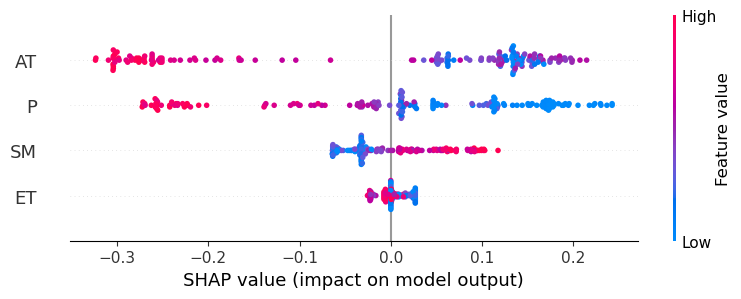

In [54]:
# Summary plot i.e., the combination of feature importance and feature effect plots
shap.summary_plot(shap_valuestr, X_train, feature_names = X_train.columns)

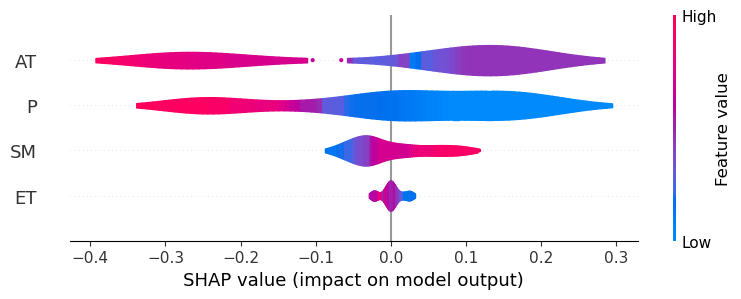

In [55]:
shap.summary_plot(shap_valuestr, X_train, feature_names = X_train.columns, plot_type = 'violin')

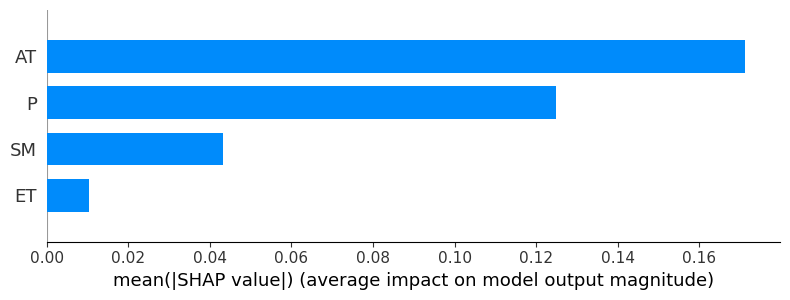

In [56]:
# Feature importance plot
shap.summary_plot(shap_valuestr, X_train, feature_names = X_train.columns, plot_type = 'bar')

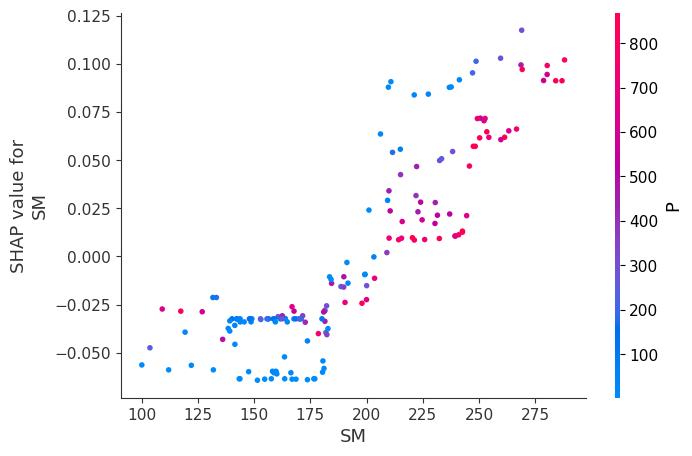

In [58]:
# Dependence plot
shap.dependence_plot(3, shap_valuestr, X_train, feature_names = X_train.columns)

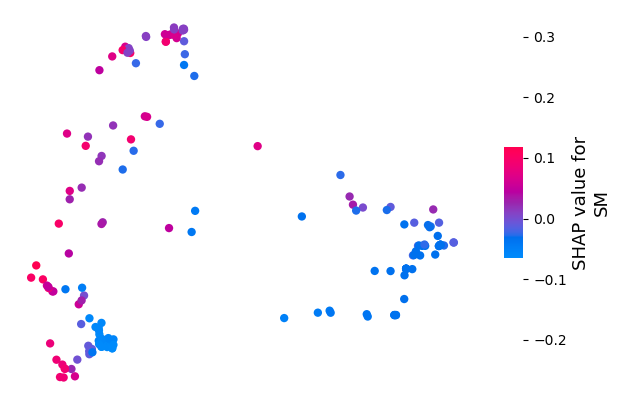

In [62]:
# Embedding plot, projection of shap values to 2D using PCA for visualization
shap.embedding_plot('SM', explainer.shap_values(X_train), feature_names = X_train.columns)

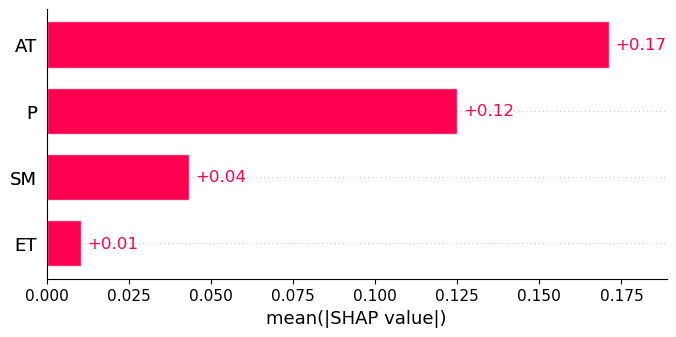

In [64]:
# Global plot
shap_valuestr = explainer(X_train)
shap.plots.bar(shap_valuestr)

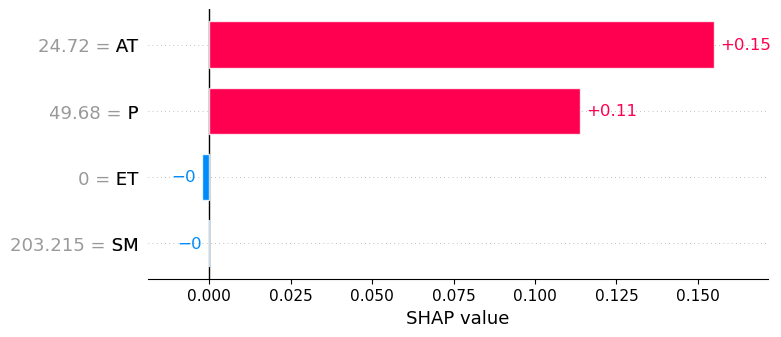

In [65]:
# Local plot
shap.plots.bar(shap_valuestr[0])

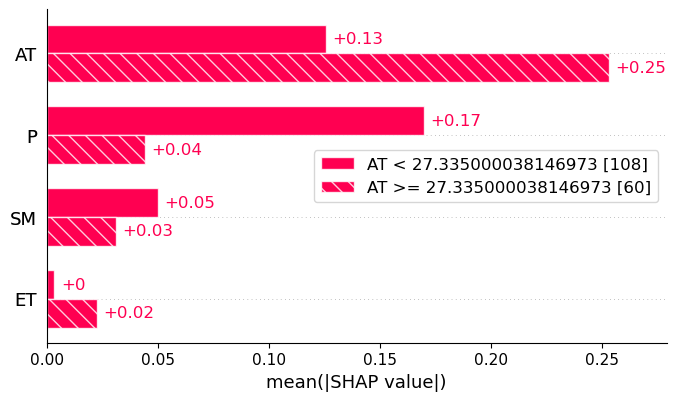

In [66]:
# Auto-cohort plot
shap.plots.bar(shap_valuestr.cohorts(2).abs.mean(0))

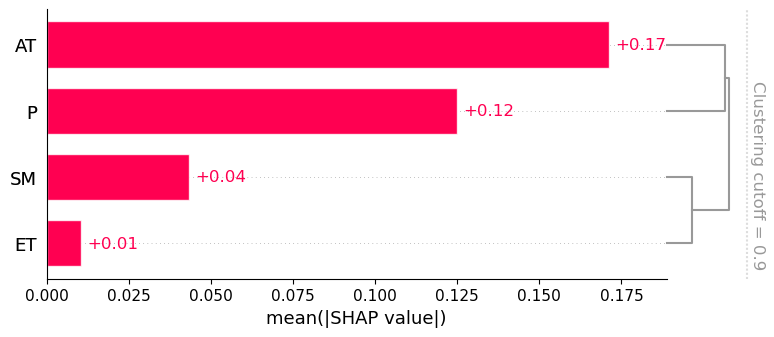

In [71]:
# Feature clustering plot
clustering = shap.utils.hclust(X_train, y_train)
shap.plots.bar(shap_valuestr, clustering = clustering, clustering_cutoff = 0.9)

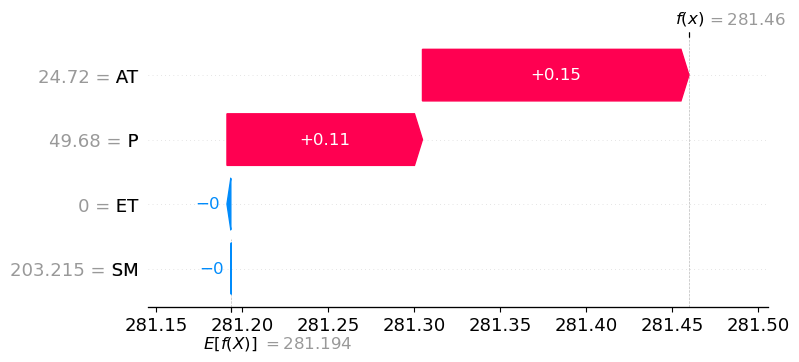

In [72]:
# Waterfall plot
shap.plots.waterfall(shap_valuestr[0])

In [73]:
# Force plot
shap.plots.force(shap_valuestr[0])

In [74]:
# Shap values on the testing dataset
shap_valuests = explainer(X_test)

In [76]:
# Outputting shap_valuests
shap_valuests

.values =
array([[ 1.85821530e-03,  1.32058440e-01,  1.70034648e-01,
        -5.42197265e-02],
       [ 4.81530990e-04,  5.39191343e-02, -2.53729269e-01,
         6.61067575e-02],
       [-3.65478361e-05,  1.42335245e-01,  1.53249824e-01,
        -6.14049644e-02],
       [-2.21011907e-02, -2.98681034e-01,  2.48791267e-02,
        -3.23723903e-02],
       [-3.65478361e-05,  1.40599012e-01,  1.93777462e-01,
        -1.05723133e-02],
       [ 2.43434154e-02, -2.50739888e-01,  1.08187663e-01,
        -2.93235893e-02],
       [ 8.68691740e-04,  1.79742171e-01,  4.81851393e-02,
         3.78118642e-02],
       [ 6.59880808e-03,  1.99176917e-01,  1.14163812e-01,
         5.07005797e-02],
       [-7.09912362e-04,  1.50605301e-01, -1.88598676e-01,
        -1.56516548e-02],
       [ 2.22264543e-02, -2.61958749e-01,  5.55369386e-02,
        -3.34232986e-02],
       [-7.50126244e-03,  5.10323092e-02, -2.68775831e-01,
         9.20932948e-03],
       [-2.27525592e-02, -3.04006031e-01,  1.11981614e-

In [ ]:
# Some plots

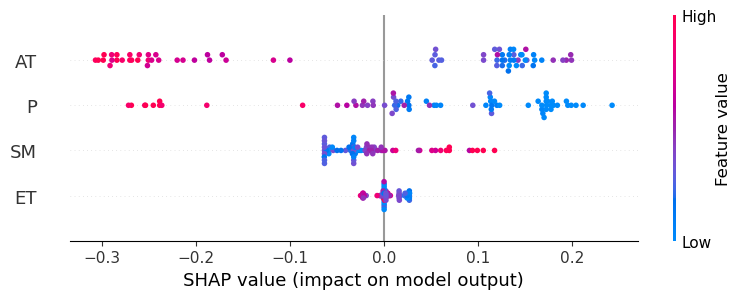

In [77]:
# Summary plot
shap.summary_plot(shap_valuests, X_test, feature_names = X_test.columns)

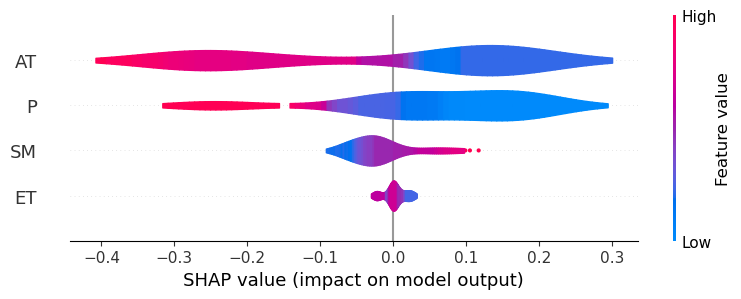

In [78]:
shap.summary_plot(shap_valuests, X_test, feature_names = X_test.columns, plot_type = 'violin')

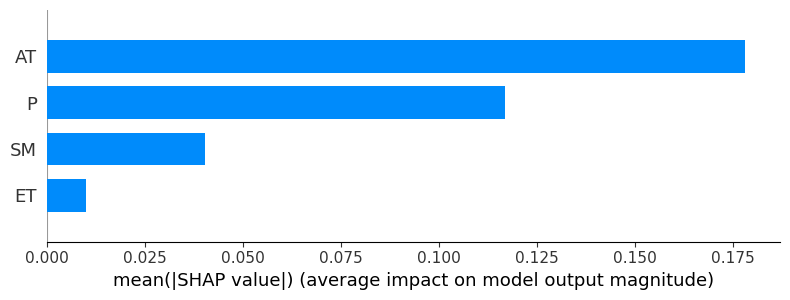

In [79]:
# Feature importance
shap.summary_plot(shap_valuests, X_test, feature_names = X_test.columns, plot_type = 'bar')

In [84]:
# Dependence plot
#shap.dependence_plot(3, shap_valuests, X_test, feature_names = X_test.columns)

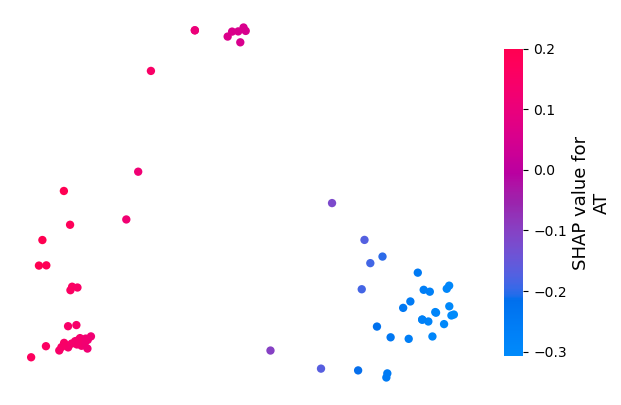

In [86]:
# Embedding plot
shap.embedding_plot('AT', explainer.shap_values(X_test), feature_names = X_test.columns)

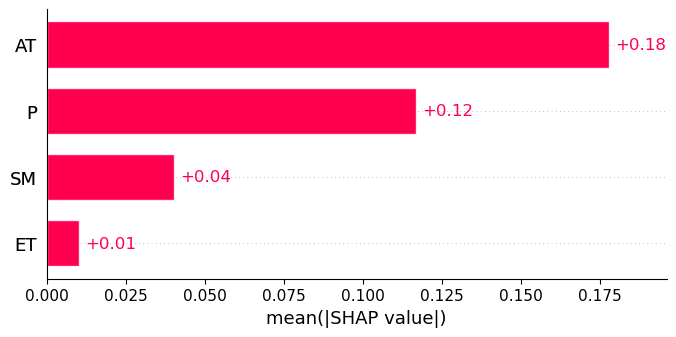

In [88]:
# Global plot
shap_valuests = explainer(X_test)
shap.plots.bar(shap_valuests)

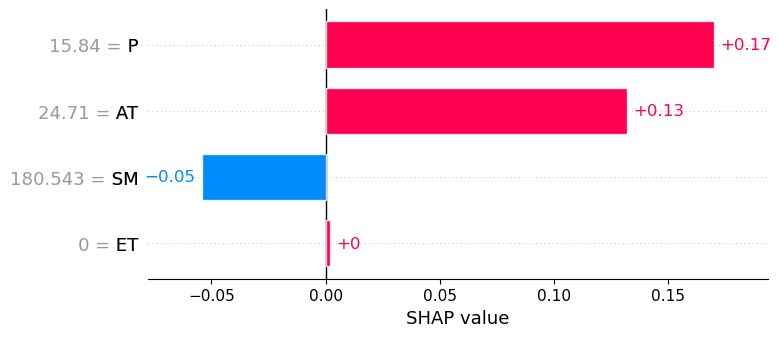

In [90]:
# Local plot
shap.plots.bar(shap_valuests[0])

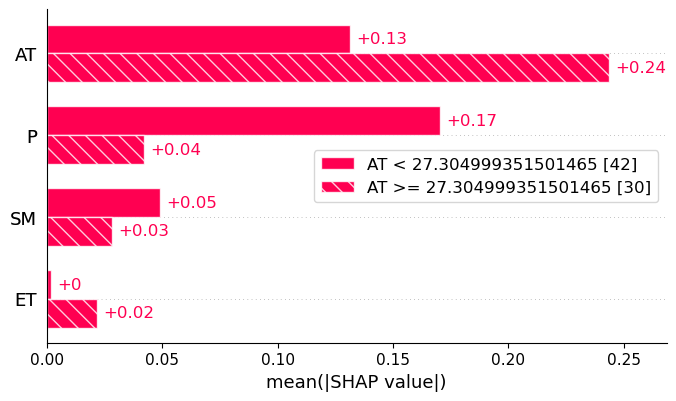

In [91]:
# Auto-cohort plot
shap.plots.bar(shap_valuests.cohorts(2).abs.mean(0))

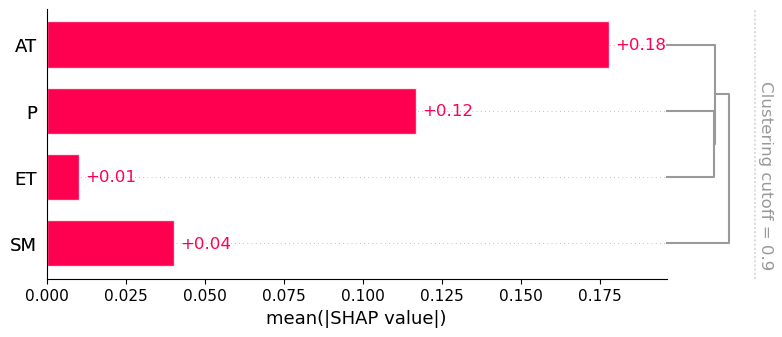

In [97]:
# Feature clustering plot
clustering = shap.utils.hclust(X_test, y_test)
shap.plots.bar(shap_valuests, clustering = clustering, clustering_cutoff = 0.9)

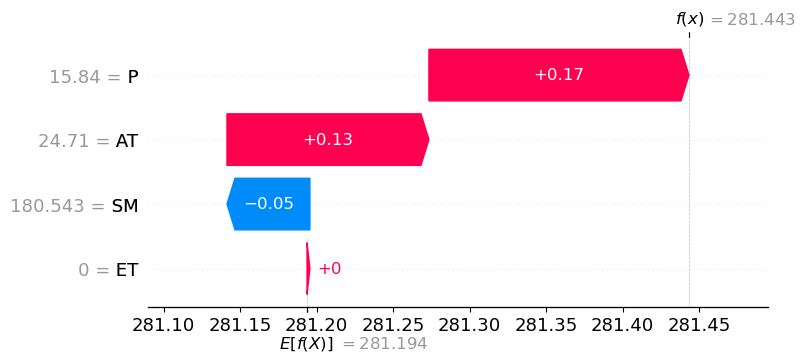

In [98]:
# Waterfall plot
shap.plots.waterfall(shap_valuests[0])

In [99]:
#Force plot
shap.plots.force(shap_valuests[0])